# Transform Examples

Examples to demonstrate the `specsim.transform` module documented [here](http://specsim.readthedocs.io/en/latest/api.html#module-specsim.transform).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.units as u
import astropy.time
import astropy.coordinates
import astropy.table

In [3]:
import specsim
print(specsim.__version__)
from specsim.transform import create_observing_model, sky_to_altaz, altaz_to_sky

0.12dev764.dev728


## Atmospheric Refraction Model

Set default observing model parameters:

In [4]:
where = specsim.transform.observatories['KPNO']
when = astropy.time.Time(56383, format='mjd')
wlen = 5400 * u.Angstrom
temperature = 5 * u.deg_C
pressure = 800 * u.kPa
default_model = specsim.transform.create_observing_model(where=where, when=when,
    wavelength=wlen, temperature=temperature, pressure=pressure)

Calculate the round trip accuracy as a function of altitude:

In [5]:
alt_in = np.linspace(10., 89., 80) * u.deg
az_in = 90 * u.deg
roundtrip_sky = altaz_to_sky(alt_in, az_in, default_model)
altaz_out = sky_to_altaz(roundtrip_sky, default_model)

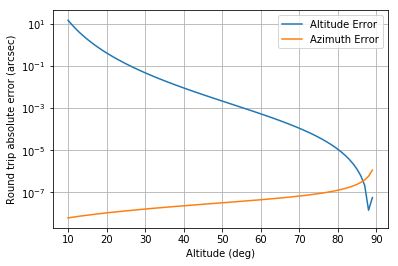

In [6]:
plt.plot(alt_in.to(u.deg).value, np.abs((altaz_out.alt - alt_in).to(u.arcsec).value), label='Altitude Error')
plt.plot(alt_in.to(u.deg).value, np.abs((altaz_out.az - az_in).to(u.arcsec).value), label='Azimuth Error')
plt.legend()
plt.xlabel('Altitude (deg)')
plt.ylabel('Round trip absolute error (arcsec)')
plt.yscale('log')
plt.grid()

Print a table of round-trip errors suitable for pasting into a docstring:

In [7]:
errors_table = astropy.table.Table([
        astropy.table.Column(name='Altitude (deg)', data=alt_in[:40:5].to(u.deg)),
        astropy.table.Column(name='Error (arcsec)', data=(altaz_out.alt - alt_in)[:40:5].to(u.arcsec), format='.3f')
    ])
astropy.io.ascii.write(errors_table, format='fixed_width_two_line', position_char='=')

Altitude (deg) Error (arcsec)
============== ==============
          10.0        -15.175
          15.0         -1.891
          20.0         -0.425
          25.0         -0.130
          30.0         -0.048
          35.0         -0.020
          40.0         -0.009
          45.0         -0.004
